In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, BisectingKMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap

C:\Users\Felle\AppData\Local\Temp\ipykernel_17484\2926830402.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(scatterplot[:, 0], scatterplot[:, 1], c=kmeans_labels, cmap=get_cmap('Set1'))
C:\Users\Felle\AppData\Local\Temp\ipykernel_17484\2926830402.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(scatterplot[:, 0], scatterplot[:, 1], c=bkm_labels, cmap=get_cmap('Set1'))
C:\Users\Felle\AppData\Local\Temp\ipykernel_17484\2926830402.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.c

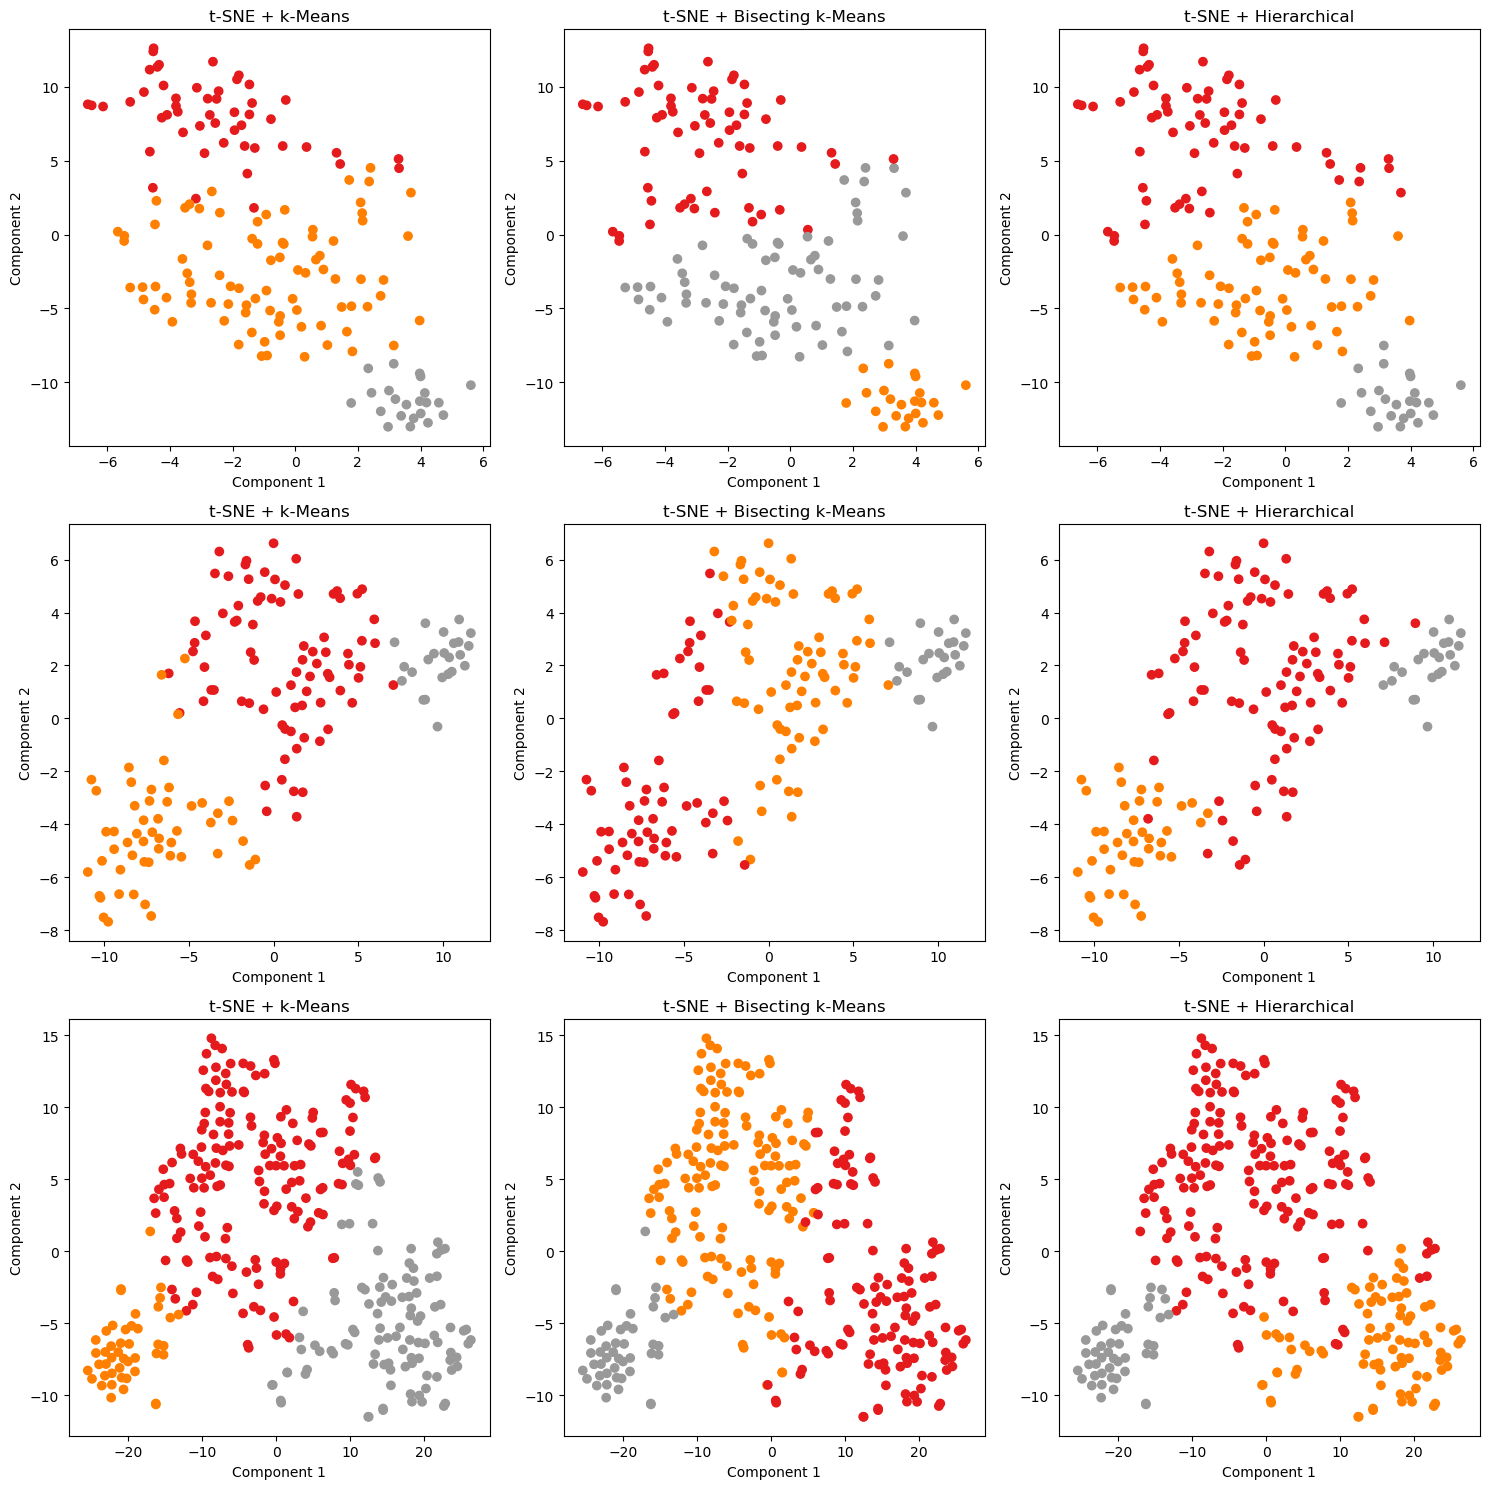

In [2]:
# Load the datasets
dataset_files = ['2018.csv', '2019.csv', 'report_2018-2019.csv']
datasets = []

for file in dataset_files:
    datasets.append(pd.read_csv(file))

# Perform dimensionality reduction and create scatterplot matrix
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

techniques = ['t-SNE']

for i, dataset in enumerate(datasets):
    # Select relevant columns for analysis
    selected_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    data = dataset[selected_columns]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Apply dimensionality reduction technique (t-SNE)
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(scaled_data)

    # Perform clustering on the reduced data
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    bkm = BisectingKMeans(n_clusters=3, n_init=10)
    bkm_labels = bkm.fit_predict(scaled_data)

    hierarchical = AgglomerativeClustering(n_clusters=3)
    hierarchical_labels = hierarchical.fit_predict(scaled_data)

    # Create scatterplot for each technique and clustering
    scatterplot = X_tsne

    ax = axes[i, 0]
    ax.scatter(scatterplot[:, 0], scatterplot[:, 1], c=kmeans_labels, cmap=get_cmap('Set1'))
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title('t-SNE + k-Means')

    ax = axes[i, 1]
    ax.scatter(scatterplot[:, 0], scatterplot[:, 1], c=bkm_labels, cmap=get_cmap('Set1'))
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title('t-SNE + Bisecting k-Means')

    ax = axes[i, 2]
    ax.scatter(scatterplot[:, 0], scatterplot[:, 1], c=hierarchical_labels, cmap=get_cmap('Set1'))
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title('t-SNE + Hierarchical')

plt.tight_layout()
plt.show()
